<a href="https://colab.research.google.com/github/PratyushKattel/DL_and_ML/blob/main/momentum_implementaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [67]:
class my_linear_SGD:

  def __init__(self,beta,learning_rate=0.01,epochs=100,):
    self.w=0
    self.b=0
    self.a=learning_rate
    self.vdw=0
    self.vdb=0
    self.epochs=epochs
    self.beta=beta
    self.loss_history=[]
    self.loss_mega_history=[]
    self.omega_history=[]
    self.epoch_count=[]


  def fit(self,X,y):
    for i in range(self.epochs):
      for j in range(X.shape[0]):
        id=np.random.randint(X.shape[0])
        er=y[id]-self.predict(X[id])
        self.loss_history.append(0.5*er**2)
        dw=-X[id]*(er)
        db=-er
        self.vdw=self.beta*self.vdw+(1-self.beta)*dw
        self.vdb=self.beta*self.vdb+(1-self.beta)*db
        self.w=self.w-self.a*self.vdw
        self.b=self.b-self.a*self.vdb
      self.loss_mega_history.append(np.mean(self.loss_history))
      self.omega_history.append(self.w)
      self.loss_history.clear()
      self.epoch_count.append(i)


  def ret_loss(self):
    return self.loss_mega_history,self.omega_history,self.epoch_count

  def get_info(self):
    print("THe number of epocsh is:",self.epochs)
    print("the loss is :",self.loss_mega_history[-1])

  def predict(self,X):
    return np.dot(X,self.w)+self.b


In [334]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=400,n_features=1,noise=30,random_state=42)

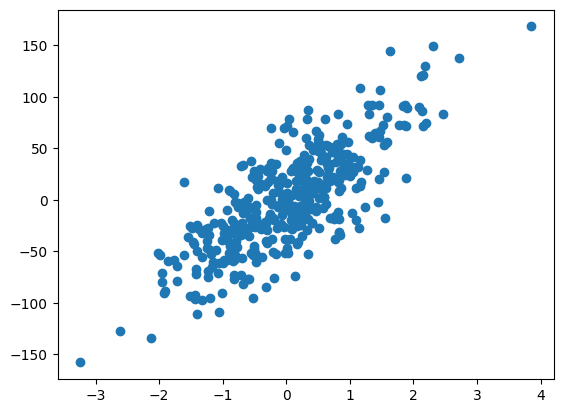

In [335]:
import matplotlib.pyplot as plt
plt.plot(X,y,'o')

In [340]:
my_lr=my_linear_SGD(0.9,learning_rate=0.1,epochs=20)
my_lr.fit(X,y)
my_lr.get_info()

THe number of epocsh is: 20
the loss is : 491.05981471053195


In [341]:
loss,w,ep_c=my_lr.ret_loss()

In [342]:
loss=np.array(loss)
ep_c=np.array(ep_c)
w=np.array(w)

In [343]:
loss

array([546.39154948, 530.99366789, 491.3722109 , 570.17679854,
       509.79769133, 465.26686435, 481.9636451 , 536.85574266,
       555.89064436, 600.52103241, 558.40127744, 536.63852513,
       495.87398985, 528.79153701, 499.27363239, 554.84690135,
       472.10085072, 502.50056076, 581.20134339, 491.05981471])

In [344]:
np.max(loss)

np.float64(600.5210324098616)

Text(0, 0.5, 'Loss')

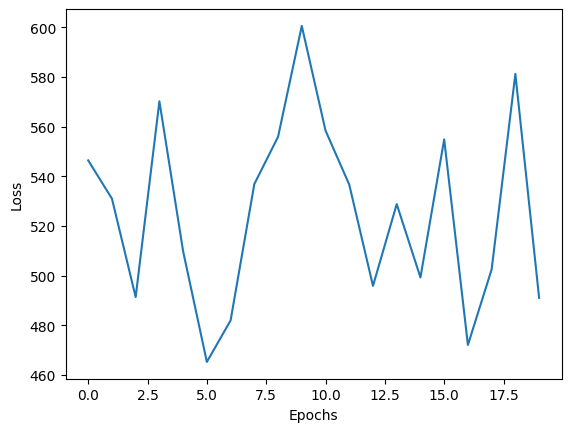

In [345]:
import seaborn as sns
sns.lineplot(x=ep_c.flatten(),y=np.array(loss).flatten())
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [346]:
class my_SGD:

  def __init__(self,alpha,epochs=100):
    self.w=0
    self.b=0
    self.a=alpha
    self.epochs=epochs
    self.loss_history=[]
    self.loss_mega_history=[]
    self.omega_history=[]
    self.epoch_count=[]


  def fit(self,X,y):
    for i in range(self.epochs):
      for j in range(X.shape[0]):
        id=np.random.randint(X.shape[0])
        er=y[id]-self.predict(X[id])
        self.loss_history.append(0.5*er**2)
        dw=-X[id]*(er)
        db=-er

        self.w=self.w-self.a*dw
        self.b=self.b-self.a*db
      self.loss_mega_history.append(np.mean(self.loss_history))
      self.omega_history.append(self.w)
      self.loss_history.clear()
      self.epoch_count.append(i)


  def ret_loss(self):
    return self.loss_mega_history,self.omega_history,self.epoch_count

  def get_info(self):
    print("THe number of epocsh is:",self.epochs)
    print("the loss is :",self.loss_mega_history[-1])

  def predict(self,X):
    return np.dot(X,self.w)+self.b


In [352]:
lr2=my_SGD(00.1,epochs=20)

In [353]:

lr2.fit(X,y)

In [354]:
lr2.get_info()

THe number of epocsh is: 20
the loss is : 530.3513493743999


In [355]:
loss,omega,epochs=lr2.ret_loss()

Text(0, 0.5, 'Loss')

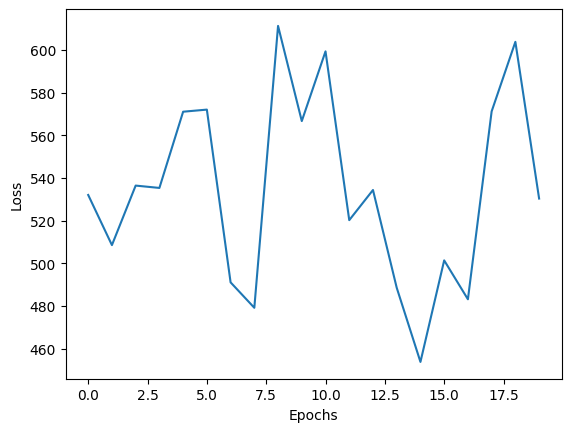

In [356]:
sns.lineplot(x=epochs,y=loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [124]:
np.max(loss)

np.float64(438.4280911186604)